# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import seaborn as sns
import numpy as np 
import re
import os
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
from datetime import datetime, timedelta

# Visualization Style

In [2]:
formatter = ticker.StrMethodFormatter('Rp.{x:,.0f}')

sns.set_theme(style='darkgrid')
sns.set_palette("deep")
mpl.rcParams['font.family'] = 'sans'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

# Data Collecting

- Import system path

In [3]:
import sys
sys.path.append('..')

- Import module

In [4]:
from scripts import get_data_from_mongo

- Get Data from MongoDB

In [5]:
df_import = get_data_from_mongo.get_data_mongo('tanah_bali_raw')
df_import = pd.DataFrame(df_import)

----------------------------------------------
Connected to db db_tanah_bali
Total documents get: 26838
Dissconnected!


In [57]:
df = df_import.copy()
df.head()

,_id,title,date,price,address,land_area,timestamp
0,6649e16d9c170999ee69ca6f,TANAH TERMURAH LODTUNDUH UBUD JALAN 6 METER,Diperbarui 4 jam yang lalu oleh,"Rp 3,5 Juta /m²","Ubud, Gianyar",200 m²,2024-05-19 16:25:20
1,6649e16d9c170999ee69ca70,Tanah Plot Kecil Link Villa dan Guesthouse Kam...,Diperbarui 1 jam yang lalu oleh,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,2024-05-19 16:25:20
2,6649e16d9c170999ee69ca71,Lahan Ocean View Di Kawasan One Gate System,Diperbarui 2 jam yang lalu oleh,"Rp 9,5 Juta /m²","Ungasan, Badung",376 m²,2024-05-19 16:25:20
3,6649e16d9c170999ee69ca72,Di Jual Tanah Kavling Bidadari Seminyak Bali,Diperbarui 2 jam yang lalu oleh,Rp 15 Juta /m²,"Seminyak, Badung",100 m²,2024-05-19 16:25:20
4,6649e16d9c170999ee69ca73,Tanah MURAH Ocean View Jl Palapa Dharmawangsa,Diperbarui 2 jam yang lalu oleh,Rp 450 Juta /m²,"Nusa Dua, Badung",380 m²,2024-05-19 16:25:20


# Data Understanding

### Check Dataframe Dimension

In [58]:
df.shape

(26838, 7)

In [59]:
df.columns

Index(['_id', 'title', 'date', 'price', 'address', 'land_area', 'timestamp'], dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26838 entries, 0 to 26837
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   _id        26838 non-null  object        
 1   title      26838 non-null  object        
 2   date       26838 non-null  object        
 3   price      26838 non-null  object        
 4   address    26838 non-null  object        
 5   land_area  26838 non-null  object        
 6   timestamp  26838 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 1.4+ MB


# Data Preprocessing

### Handling Missing Value

In [61]:
df.isna().sum().to_frame().T

,_id,title,date,price,address,land_area,timestamp
0,0,0,0,0,0,0,0


### Handling Duplicate Data

- Drop _id Column

In [62]:
df = df.drop(columns='_id', axis=1)
df.head()

,title,date,price,address,land_area,timestamp
0,TANAH TERMURAH LODTUNDUH UBUD JALAN 6 METER,Diperbarui 4 jam yang lalu oleh,"Rp 3,5 Juta /m²","Ubud, Gianyar",200 m²,2024-05-19 16:25:20
1,Tanah Plot Kecil Link Villa dan Guesthouse Kam...,Diperbarui 1 jam yang lalu oleh,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,2024-05-19 16:25:20
2,Lahan Ocean View Di Kawasan One Gate System,Diperbarui 2 jam yang lalu oleh,"Rp 9,5 Juta /m²","Ungasan, Badung",376 m²,2024-05-19 16:25:20
3,Di Jual Tanah Kavling Bidadari Seminyak Bali,Diperbarui 2 jam yang lalu oleh,Rp 15 Juta /m²,"Seminyak, Badung",100 m²,2024-05-19 16:25:20
4,Tanah MURAH Ocean View Jl Palapa Dharmawangsa,Diperbarui 2 jam yang lalu oleh,Rp 450 Juta /m²,"Nusa Dua, Badung",380 m²,2024-05-19 16:25:20


- Check Duplicate Data

In [63]:
dup_data = df.duplicated().sum()
print(f'Jumlah data duplicate: {dup_data}')
print(f'Dari total {df.shape[0]} data')

Jumlah data duplicate: 321
Dari total 26838 data


In [64]:
df[df.duplicated()]

,title,date,price,address,land_area,timestamp
83,TANAH BONUS BANGUNAN DI JL UTAMA DEWI MADRI CO...,Diperbarui 7 jam yang lalu oleh,Rp 9 Miliar Total,"Denpasar Selatan, Denpasar",577 m²,2024-05-19 16:25:51
264,TANAH MURAH COCOK BUAT BANGUN RUMAH VILLA,Diperbarui 1 hari yang lalu oleh,Rp 405 Juta Total,"Sukawati, Gianyar",141 m²,2024-05-19 16:27:02
279,"LAHAN BUC DENGAN VIEW MENAWAN DI TEGALLALANG, ...",Diperbarui 1 hari yang lalu oleh,"Rp 7,75 Miliar Total","Tegallalang, Gianyar",3100 m²,2024-05-19 16:27:04
314,LAST 8 UNITS !! Ultimate Cliff Front Land & Fo...,Diperbarui 1 hari yang lalu oleh,"Rp 3,5 Juta /m²","Seraya, Karangasem",700 m²,2024-05-19 16:27:19
441,Tanah Kebun cocok untuk Villa di Sanget Singaraja,Diperbarui 2 hari yang lalu oleh,"Rp 2,27 Miliar Total","Sukasada, Buleleng",3790 m²,2024-05-19 16:28:12
...,...,...,...,...,...,...
23370,"Tanah 3,45 Are Area Seminyak, Bali",Diperbarui 3 bulan yang lalu oleh,"Rp 3,1 Miliar Total","Seminyak, Badung",345 m²,2024-05-19 18:59:22
23811,"Kavling Ocean View Cocok Untuk Vila di Pecatu,...",Diperbarui 3 bulan yang lalu oleh,"Rp 61,6 Miliar Total","Pecatu, Badung",15500 m²,2024-05-19 19:02:18
24565,"For Sale Land 4,55 Are At Suluban, Pecatu, Bali",Diperbarui 2 bulan yang lalu oleh,Rp 6 Juta /m²,"Pecatu, Badung",455 m²,2024-05-19 19:07:33
24577,Tanah 20 Are Unblocked View di Temu Dewi Pecat...,Diperbarui 2 bulan yang lalu oleh,"Rp 4,5 Juta /m²","Pecatu, Badung",2000 m²,2024-05-19 19:07:40


- Remove Duplicate Data

In [65]:
df.drop_duplicates(keep='first', inplace=True)

dup_data = df.duplicated().sum()
print(f'Jumlah data duplicate: {dup_data}')
print(f'Dari total {df.shape[0]} data')

Jumlah data duplicate: 0
Dari total 26517 data


- Remove Unnessecary Data

In [66]:
df = df.drop(columns='title', axis=1)
df.columns

Index(['date', 'price', 'address', 'land_area', 'timestamp'], dtype='object')

### Cleaning Date Column

- Check Date Column

In [67]:
df['date'].head().to_frame()

,date
0,Diperbarui 4 jam yang lalu oleh
1,Diperbarui 1 jam yang lalu oleh
2,Diperbarui 2 jam yang lalu oleh
3,Diperbarui 2 jam yang lalu oleh
4,Diperbarui 2 jam yang lalu oleh


- Convert String to Datetime Data Type

In [68]:
import locale
locale.setlocale(locale.LC_TIME, 'id_ID.UTF-8')

def convert_relative_data(description, timestamp):
    match = re.search(r'(\d+) (menit|jam|hari|minggu|bulan)', description)
    if not match:
        return None
    
    value = int(match.group(1))
    unit = match.group(2)
    
    if unit == 'menit':
        delta = timedelta(minutes=value)
    elif unit == 'jam':
        delta = timedelta(hours=value)
    elif unit == 'hari':
        delta = timedelta(days=value)
    elif unit == 'minggu':
        delta = timedelta(weeks=value)
    elif unit == 'bulan':
        delta = timedelta(days=30 * value)
    else:
        delta = timedelta()
    
    date = timestamp - delta
    return date

def convert_absolute_date(text):
    date_pattern = r'\b\d{2}\s\w+\s\d{4}\b'
    match = re.search(date_pattern, text)
    if match:
        return datetime.strptime(match.group(0), '%d %B %Y')
    return None

def convert_to_timestamp(row):
    description = row['date']
    timestamp = row['timestamp']
    
    if 'yang lalu' in description:
        return convert_relative_data(description, timestamp)
    else:
        return convert_absolute_date(description)

In [69]:
df['converted_date'] = df.apply(convert_to_timestamp, axis=1).dt.strftime('%Y-%m-%d')

df_cleaned_date = df.copy()
df_cleaned_date.head()

,date,price,address,land_area,timestamp,converted_date
0,Diperbarui 4 jam yang lalu oleh,"Rp 3,5 Juta /m²","Ubud, Gianyar",200 m²,2024-05-19 16:25:20,2024-05-19
1,Diperbarui 1 jam yang lalu oleh,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,2024-05-19 16:25:20,2024-05-19
2,Diperbarui 2 jam yang lalu oleh,"Rp 9,5 Juta /m²","Ungasan, Badung",376 m²,2024-05-19 16:25:20,2024-05-19
3,Diperbarui 2 jam yang lalu oleh,Rp 15 Juta /m²,"Seminyak, Badung",100 m²,2024-05-19 16:25:20,2024-05-19
4,Diperbarui 2 jam yang lalu oleh,Rp 450 Juta /m²,"Nusa Dua, Badung",380 m²,2024-05-19 16:25:20,2024-05-19


In [71]:
df_cleaned_date.sort_values(by='converted_date', ascending=True)

,date,price,address,land_area,timestamp,converted_date
23788,Diperbarui 11 Desember 2022 oleh,Rp 7 Juta /m²,"Sanur Kauh, Denpasar",500 m²,2024-05-19 19:02:09,2022-12-11
23734,Diperbarui 15 Desember 2022 oleh,"Rp 5,5 Miliar Total","Kediri, Tabanan",2200 m²,2024-05-19 19:01:45,2022-12-15
23730,Diperbarui 16 Desember 2022 oleh,"Rp 8,12 Miliar Total","Canggu, Badung",956 m²,2024-05-19 19:01:45,2022-12-16
23692,Diperbarui 22 Desember 2022 oleh,Rp 11 Juta /m²,"Kediri, Tabanan",105 m²,2024-05-19 19:01:28,2022-12-22
23677,Diperbarui 27 Desember 2022 oleh,"Rp 3,25 Juta /m²","Candi Dasa, Karangasem",2510 m²,2024-05-19 19:01:21,2022-12-27
...,...,...,...,...,...,...
2805,Diperbarui 10 jam yang lalu oleh,Rp 450 Ribu /m²,"Nusa Penida, Klungkung",45000 m²,2024-05-19 16:43:22,2024-05-19
151,Diperbarui 12 jam yang lalu oleh,"Rp 2,4 Miliar Total","Ungasan, Badung",400 m²,2024-05-19 16:26:15,2024-05-19
23837,Diperbarui 5 jam yang lalu oleh,"Rp 12,5 Miliar Total","Belok, Badung",2500 m²,2024-05-19 19:02:27,2024-05-19
18682,Diperbarui 10 jam yang lalu oleh,"Rp 5,5 Juta /m²","Pecatu, Badung",1500 m²,2024-05-19 18:28:32,2024-05-19


- Backup Dataframe

In [75]:
df = df_cleaned_date.copy()
df.head()

,date,price,address,land_area,timestamp,converted_date
0,Diperbarui 4 jam yang lalu oleh,"Rp 3,5 Juta /m²","Ubud, Gianyar",200 m²,2024-05-19 16:25:20,2024-05-19
1,Diperbarui 1 jam yang lalu oleh,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,2024-05-19 16:25:20,2024-05-19
2,Diperbarui 2 jam yang lalu oleh,"Rp 9,5 Juta /m²","Ungasan, Badung",376 m²,2024-05-19 16:25:20,2024-05-19
3,Diperbarui 2 jam yang lalu oleh,Rp 15 Juta /m²,"Seminyak, Badung",100 m²,2024-05-19 16:25:20,2024-05-19
4,Diperbarui 2 jam yang lalu oleh,Rp 450 Juta /m²,"Nusa Dua, Badung",380 m²,2024-05-19 16:25:20,2024-05-19


- Detele Converted_Date and Timestamp Columns 

In [76]:
df['date'] = df['converted_date']
df =df.drop(columns=['timestamp', 'converted_date'])

df.head()

,date,price,address,land_area
0,2024-05-19,"Rp 3,5 Juta /m²","Ubud, Gianyar",200 m²
1,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²
2,2024-05-19,"Rp 9,5 Juta /m²","Ungasan, Badung",376 m²
3,2024-05-19,Rp 15 Juta /m²,"Seminyak, Badung",100 m²
4,2024-05-19,Rp 450 Juta /m²,"Nusa Dua, Badung",380 m²


### Cleaning Land Area Column

- Check Land Area Column

In [78]:
df['land_area'].head()

0    200 m²
1    200 m²
2    376 m²
3    100 m²
4    380 m²
Name: land_area, dtype: object

- Convert String to Float Datatype

In [79]:
df['numeric_land_area'] = df['land_area'].str.replace(r'm²', '', regex=True).astype(float)

df_cleaned_land_area = df.copy()

df.head()

,date,price,address,land_area,numeric_land_area
0,2024-05-19,"Rp 3,5 Juta /m²","Ubud, Gianyar",200 m²,200.0
1,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,200.0
2,2024-05-19,"Rp 9,5 Juta /m²","Ungasan, Badung",376 m²,376.0
3,2024-05-19,Rp 15 Juta /m²,"Seminyak, Badung",100 m²,100.0
4,2024-05-19,Rp 450 Juta /m²,"Nusa Dua, Badung",380 m²,380.0


- Backup Dataframe

In [80]:
df = df_cleaned_land_area.copy()

df.head()

,date,price,address,land_area,numeric_land_area
0,2024-05-19,"Rp 3,5 Juta /m²","Ubud, Gianyar",200 m²,200.0
1,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200 m²,200.0
2,2024-05-19,"Rp 9,5 Juta /m²","Ungasan, Badung",376 m²,376.0
3,2024-05-19,Rp 15 Juta /m²,"Seminyak, Badung",100 m²,100.0
4,2024-05-19,Rp 450 Juta /m²,"Nusa Dua, Badung",380 m²,380.0


- Delete Numeric_Land_Area Column

In [82]:
df['land_area'] = df['numeric_land_area']
df = df.drop(columns='numeric_land_area', axis=1)

df.head()

,date,price,address,land_area
0,2024-05-19,"Rp 3,5 Juta /m²","Ubud, Gianyar",200.0
1,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200.0
2,2024-05-19,"Rp 9,5 Juta /m²","Ungasan, Badung",376.0
3,2024-05-19,Rp 15 Juta /m²,"Seminyak, Badung",100.0
4,2024-05-19,Rp 450 Juta /m²,"Nusa Dua, Badung",380.0


### Cleaning Price Column

- Check Price Column

In [83]:
df['price'].head()

0    Rp 3,5 Juta /m²
1      Rp 4 Juta /m²
2    Rp 9,5 Juta /m²
3     Rp 15 Juta /m²
4    Rp 450 Juta /m²
Name: price, dtype: object

- Check Anomaly Value on Price

In [84]:
dirty_data = df[df['price'].str.contains('Miliar /m²')]
dirty_data

,date,price,address,land_area
163,2024-05-19,"Rp 1,5 Miliar /m²","Canggu, Badung",100.0
437,2024-05-17,"Rp 13,9 Miliar /m²","Denpasar Selatan, Denpasar",1636.0
682,2024-01-20,Rp 85 Miliar /m²,"Kuta Selatan, Badung",9300.0
926,2024-05-15,"Rp 4,22 Miliar /m²","Kediri, Tabanan",1320.0
1208,2024-05-13,Rp 85 Miliar /m²,"Kediri, Tabanan",1750.0
...,...,...,...,...
25560,2024-02-19,"Rp 7,5 Miliar /m²","Canggu, Badung",975.0
25565,2023-12-21,Rp 1 Miliar /m²,"Goa Gong, Badung",1360.0
25628,2024-03-20,Rp 45 Miliar /m²,"Uluwatu, Badung",12300.0
25649,2024-03-20,Rp 2 Miliar /m²,"Seminyak, Badung",2000.0


- Delete Anomaly Value

In [85]:
df = df.drop(dirty_data.index)
df.head()

,date,price,address,land_area
0,2024-05-19,"Rp 3,5 Juta /m²","Ubud, Gianyar",200.0
1,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200.0
2,2024-05-19,"Rp 9,5 Juta /m²","Ungasan, Badung",376.0
3,2024-05-19,Rp 15 Juta /m²,"Seminyak, Badung",100.0
4,2024-05-19,Rp 450 Juta /m²,"Nusa Dua, Badung",380.0


In [86]:
dirty_data = df[df['price'].str.contains('Miliar /m²')]
dirty_data.count()

date         0
price        0
address      0
land_area    0
dtype: int64

- Change String to Float Datatype

In [87]:
def parse_price(price_str):
    is_per_square_meter = "/m²" in price_str
    
    numeric_value = re.findall(r'[0-9,]+', price_str)
    
    if not numeric_value:
        return None
    
    numeric_value = float(numeric_value[0].replace(',', '.'))
    
    if "Triliun" in price_str:
        numeric_value *= 1_000_000_000_000
    elif "Miliar" in price_str:
        numeric_value *= 1_000_000_000
    elif "Juta" in price_str:
        numeric_value *= 1_000_000
    elif "Ribu" in price_str:
        numeric_value *= 1_000_000
    
    return is_per_square_meter, numeric_value

In [88]:
df['is_per_square'], df['price_numeric'] = zip(*df['price'].apply(parse_price))

df['price_total'] = df.apply(lambda row: row['price_numeric'] * row['land_area'] if row['is_per_square'] else row['price_numeric'], axis=1).astype(float)
df['price_per_m2'] = df.apply(lambda row: row['price_numeric'] if row['is_per_square'] else row['price_total'] / row['land_area'], axis=1).astype(float)

df.head()

,date,price,address,land_area,is_per_square,price_numeric,price_total,price_per_m2
0,2024-05-19,"Rp 3,5 Juta /m²","Ubud, Gianyar",200.0,True,3500000.0,7.000000e+08,3500000.0
1,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200.0,True,4000000.0,8.000000e+08,4000000.0
2,2024-05-19,"Rp 9,5 Juta /m²","Ungasan, Badung",376.0,True,9500000.0,3.572000e+09,9500000.0
3,2024-05-19,Rp 15 Juta /m²,"Seminyak, Badung",100.0,True,15000000.0,1.500000e+09,15000000.0
4,2024-05-19,Rp 450 Juta /m²,"Nusa Dua, Badung",380.0,True,450000000.0,1.710000e+11,450000000.0


- Check Value with Readable Columns

In [89]:
df['Price_Total_str'] = df['price_total'].apply(lambda x: f"{float(x):,.0f}")
df['Price_per_m2_str'] = df['price_per_m2'].apply(lambda x: f"{float(x):,.0f}")

df_cleaned_price = df.copy()

df.head()

,date,price,address,land_area,is_per_square,price_numeric,price_total,price_per_m2,Price_Total_str,Price_per_m2_str
0,2024-05-19,"Rp 3,5 Juta /m²","Ubud, Gianyar",200.0,True,3500000.0,7.000000e+08,3500000.0,"700,000,000","3,500,000"
1,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200.0,True,4000000.0,8.000000e+08,4000000.0,"800,000,000","4,000,000"
2,2024-05-19,"Rp 9,5 Juta /m²","Ungasan, Badung",376.0,True,9500000.0,3.572000e+09,9500000.0,"3,572,000,000","9,500,000"
3,2024-05-19,Rp 15 Juta /m²,"Seminyak, Badung",100.0,True,15000000.0,1.500000e+09,15000000.0,"1,500,000,000","15,000,000"
4,2024-05-19,Rp 450 Juta /m²,"Nusa Dua, Badung",380.0,True,450000000.0,1.710000e+11,450000000.0,"171,000,000,000","450,000,000"


- Backup Dataframe

In [98]:
df = df_cleaned_price.copy()
df.head()

,date,price,address,land_area,is_per_square,price_numeric,price_total,price_per_m2,Price_Total_str,Price_per_m2_str
0,2024-05-19,"Rp 3,5 Juta /m²","Ubud, Gianyar",200.0,True,3500000.0,7.000000e+08,3500000.0,"700,000,000","3,500,000"
1,2024-05-19,Rp 4 Juta /m²,"Nusa Dua, Badung",200.0,True,4000000.0,8.000000e+08,4000000.0,"800,000,000","4,000,000"
2,2024-05-19,"Rp 9,5 Juta /m²","Ungasan, Badung",376.0,True,9500000.0,3.572000e+09,9500000.0,"3,572,000,000","9,500,000"
3,2024-05-19,Rp 15 Juta /m²,"Seminyak, Badung",100.0,True,15000000.0,1.500000e+09,15000000.0,"1,500,000,000","15,000,000"
4,2024-05-19,Rp 450 Juta /m²,"Nusa Dua, Badung",380.0,True,450000000.0,1.710000e+11,450000000.0,"171,000,000,000","450,000,000"


- Delete Unnecessary Columns

In [99]:
df['price_per_m2'] = df['price_per_m2']
df['price_total'] = df['price_total']

df = df.drop(columns=['price', 'is_per_square', 'price_numeric', 'Price_Total_str', 'Price_per_m2_str'], axis=1)

df.head()


,date,address,land_area,price_total,price_per_m2
0,2024-05-19,"Ubud, Gianyar",200.0,7.000000e+08,3500000.0
1,2024-05-19,"Nusa Dua, Badung",200.0,8.000000e+08,4000000.0
2,2024-05-19,"Ungasan, Badung",376.0,3.572000e+09,9500000.0
3,2024-05-19,"Seminyak, Badung",100.0,1.500000e+09,15000000.0
4,2024-05-19,"Nusa Dua, Badung",380.0,1.710000e+11,450000000.0


### Clean Address Column

- Check Address Column

In [101]:
df['address'].head()

0       Ubud, Gianyar
1    Nusa Dua, Badung
2     Ungasan, Badung
3    Seminyak, Badung
4    Nusa Dua, Badung
Name: address, dtype: object

- Split Address to Subdistrict and Regency Column

In [102]:
df[['subdistrict', 'regency']] = df['address'].str.split(',', n=1, expand=True)
df.head()

,date,address,land_area,price_total,price_per_m2,subdistrict,regency
0,2024-05-19,"Ubud, Gianyar",200.0,7.000000e+08,3500000.0,Ubud,Gianyar
1,2024-05-19,"Nusa Dua, Badung",200.0,8.000000e+08,4000000.0,Nusa Dua,Badung
2,2024-05-19,"Ungasan, Badung",376.0,3.572000e+09,9500000.0,Ungasan,Badung
3,2024-05-19,"Seminyak, Badung",100.0,1.500000e+09,15000000.0,Seminyak,Badung
4,2024-05-19,"Nusa Dua, Badung",380.0,1.710000e+11,450000000.0,Nusa Dua,Badung


- Remove the withespace

In [103]:
df['subdistrict'] = df['subdistrict'].str.strip()
df['regency'] = df['regency'].str.strip()
df.head()

,date,address,land_area,price_total,price_per_m2,subdistrict,regency
0,2024-05-19,"Ubud, Gianyar",200.0,7.000000e+08,3500000.0,Ubud,Gianyar
1,2024-05-19,"Nusa Dua, Badung",200.0,8.000000e+08,4000000.0,Nusa Dua,Badung
2,2024-05-19,"Ungasan, Badung",376.0,3.572000e+09,9500000.0,Ungasan,Badung
3,2024-05-19,"Seminyak, Badung",100.0,1.500000e+09,15000000.0,Seminyak,Badung
4,2024-05-19,"Nusa Dua, Badung",380.0,1.710000e+11,450000000.0,Nusa Dua,Badung


- Check Unique Value of Regency Column

In [104]:
df['regency'].unique()

array(['Gianyar', 'Badung', 'Tabanan', 'Denpasar', 'Buleleng', 'Bangli',
       'Jembrana', 'Klungkung', 'Karangasem', 'Nusa Lembongan',
       'Semarapura'], dtype=object)

- Check the Wrong Regency Value

In [105]:
df[df['regency'] == 'Nusa Lembongan']

,date,address,land_area,price_total,price_per_m2,subdistrict,regency
906,2024-02-19,"Klungkung, Nusa Lembongan",2000.0,3.000000e+09,1.500000e+06,Klungkung,Nusa Lembongan
1591,2024-05-13,"Klungkung, Nusa Lembongan",700.0,4.550000e+09,6.500000e+06,Klungkung,Nusa Lembongan
1796,2024-05-12,"Klungkung, Nusa Lembongan",800.0,1.200000e+09,1.500000e+06,Klungkung,Nusa Lembongan
3529,2023-11-21,"Klungkung, Nusa Lembongan",7500.0,2.625000e+10,3.500000e+06,Klungkung,Nusa Lembongan
6766,2024-02-19,"Klungkung, Nusa Lembongan",2600.0,1.950000e+10,7.500000e+06,Klungkung,Nusa Lembongan
7636,2024-03-20,"Klungkung, Nusa Lembongan",6735.0,5.051250e+11,7.500000e+07,Klungkung,Nusa Lembongan
8776,2024-03-20,"Klungkung, Nusa Lembongan",500.0,1.000000e+09,2.000000e+06,Klungkung,Nusa Lembongan
9104,2024-02-19,"Klungkung, Nusa Lembongan",1700.0,7.540000e+09,4.435294e+06,Klungkung,Nusa Lembongan
9105,2024-02-19,"Klungkung, Nusa Lembongan",400.0,1.200000e+09,3.000000e+06,Klungkung,Nusa Lembongan
10230,2024-02-19,"Klungkung, Nusa Lembongan",1910.0,1.140000e+10,5.968586e+06,Klungkung,Nusa Lembongan


In [106]:
df[df['regency'] == 'Semarapura']

,date,address,land_area,price_total,price_per_m2,subdistrict,regency
1176,2024-01-20,"Nusa Penida, Semarapura",3800.0,5.700000e+09,1.500000e+06,Nusa Penida,Semarapura
1195,2024-05-13,"Satra, Semarapura",4874.0,1.820000e+10,3.734099e+06,Satra,Semarapura
2386,2024-05-05,"Kutampi, Semarapura",450000.0,2.025000e+14,4.500000e+08,Kutampi,Semarapura
3055,2024-05-05,"Takmung, Semarapura",600.0,9.000000e+08,1.500000e+06,Takmung,Semarapura
3535,2024-04-28,"Klumbu, Semarapura",42900.0,1.710000e+10,3.986014e+05,Klumbu,Semarapura
...,...,...,...,...,...,...,...
26803,2024-01-20,"Nusa Penida, Semarapura",20000.0,4.000000e+12,2.000000e+08,Nusa Penida,Semarapura
26825,2024-01-20,"Pejukutan, Semarapura",50000.0,1.750000e+13,3.500000e+08,Pejukutan,Semarapura
26833,2024-01-20,"Sekartaji, Semarapura",25000.0,7.500000e+12,3.000000e+08,Sekartaji,Semarapura
26836,2024-01-20,"Ped, Semarapura",10000.0,3.000000e+12,3.000000e+08,Ped,Semarapura


- Change the Wrong Regency

In [108]:
swap = (df['subdistrict'] == 'Klungkung') & (df['regency'] == 'Nusa Lembongan')

df.loc[swap, ['subdistrict', 'regency']] = ['Nusa Lembongan', 'Klungkung']
df['regency'] = df['regency'].replace('Semarapura', 'Klungkung')

df_cleaned_address = df.copy()
df['regency'].unique()

array(['Gianyar', 'Badung', 'Tabanan', 'Denpasar', 'Buleleng', 'Bangli',
       'Jembrana', 'Klungkung', 'Karangasem'], dtype=object)

- Backup Dataframe

In [109]:
df = df_cleaned_address.copy()
df = df.drop(columns='address', axis=1)

df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency
0,2024-05-19,200.0,7.000000e+08,3500000.0,Ubud,Gianyar
1,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung
2,2024-05-19,376.0,3.572000e+09,9500000.0,Ungasan,Badung
3,2024-05-19,100.0,1.500000e+09,15000000.0,Seminyak,Badung
4,2024-05-19,380.0,1.710000e+11,450000000.0,Nusa Dua,Badung


### Outlier Handling of Land Area Column

- Data Before Outlier Handling

In [110]:
df['land_area'].describe()

count    2.636700e+04
mean     1.053858e+07
std      1.056109e+09
min      1.000000e+00
25%      4.175000e+02
50%      1.025000e+03
75%      3.380000e+03
max      1.500000e+11
Name: land_area, dtype: float64

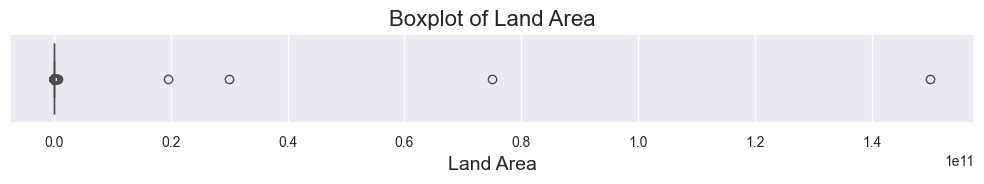

In [111]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['land_area'])
plt.title('Boxplot of Land Area')
plt.xlabel('Land Area')
plt.tight_layout()
plt.show()

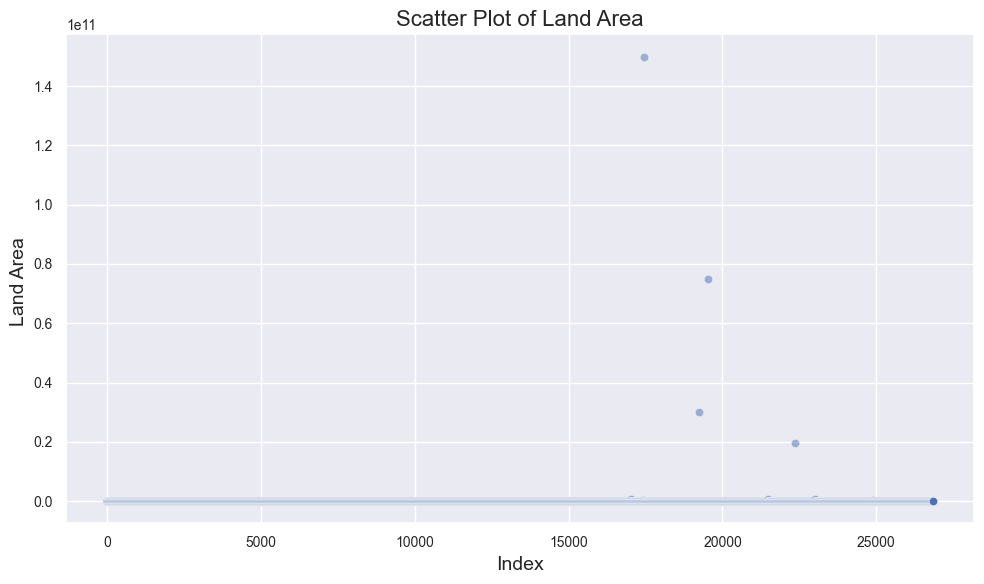

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='land_area', alpha=0.5)
plt.title('Scatter Plot of Land Area')
plt.xlabel('Index')
plt.ylabel('Land Area ')
plt.grid(True)
plt.tight_layout()
plt.show()

In [113]:
Q1 = df['land_area'].quantile(0.25)
Q3 = df['land_area'].quantile(0.75)

# Menghitung Interquartile Range (IQR)
IQR = Q3 - Q1

# Menentukan ambang batas minimum untuk gaji
min_threshold = 0

# Menghitung batas bawah, dan memastikannya tidak negatif
lower_bound = max(Q1 - 1.5 * IQR, min_threshold)

# Menghitung batas atas
upper_bound = Q3 + 1.5 * IQR

print('lower_bound: ',lower_bound)
print('upper_bound: ', upper_bound)

lower_bound:  0
upper_bound:  7823.75


In [114]:
df = df[(df['land_area'] >= lower_bound) & (df['land_area'] <= upper_bound)]

- Data After Outlier Handling

In [115]:
df['land_area'].describe()

count    22613.000000
mean      1496.956529
std       1629.431778
min          1.000000
25%        375.000000
50%        836.000000
75%       2000.000000
max       7820.000000
Name: land_area, dtype: float64

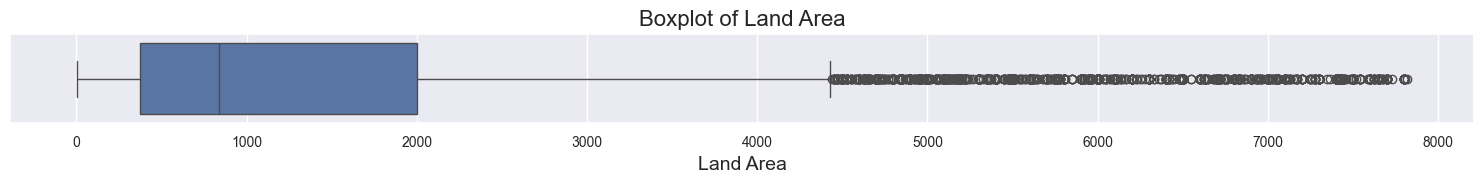

In [116]:
plt.figure(figsize=(15, 2))
sns.boxplot(x=df['land_area'])
plt.title('Boxplot of Land Area')
plt.xlabel('Land Area')
plt.tight_layout()
plt.show()

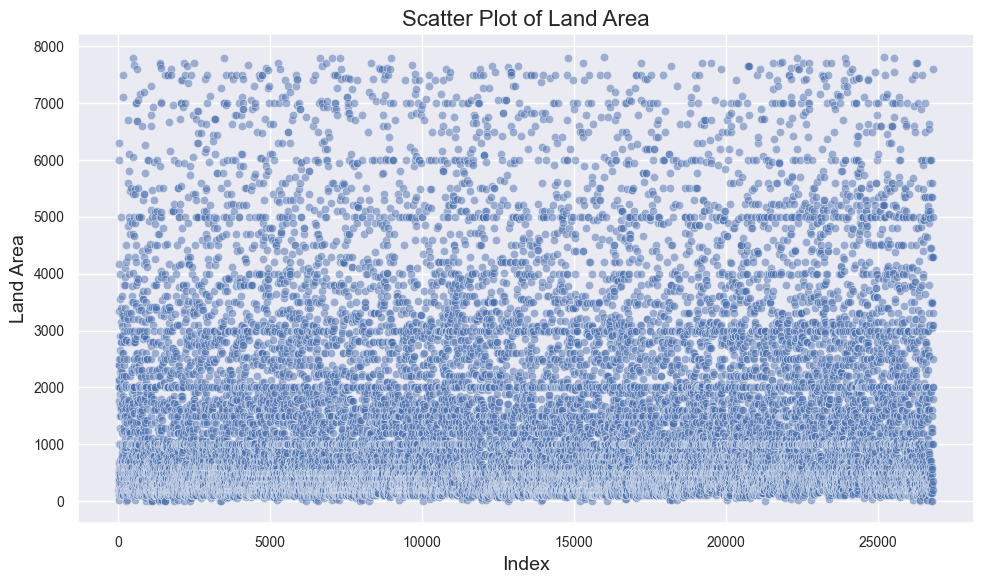

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='land_area', alpha=0.5)
plt.title('Scatter Plot of Land Area')
plt.xlabel('Index')
plt.ylabel('Land Area')
plt.grid(True)
plt.tight_layout()
plt.show()

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22613 entries, 0 to 26831
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          22613 non-null  object 
 1   land_area     22613 non-null  float64
 2   price_total   22613 non-null  float64
 3   price_per_m2  22613 non-null  float64
 4   subdistrict   22613 non-null  object 
 5   regency       22613 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.2+ MB


#### Outlier Handling of Price Total Column

- Data Before Outlier Handling

In [119]:
df['price_total'].describe()

count    2.261300e+04
mean     8.730350e+10
std      3.342887e+12
min      0.000000e+00
25%      2.250000e+09
50%      5.968000e+09
75%      1.500000e+10
max      5.000000e+14
Name: price_total, dtype: float64

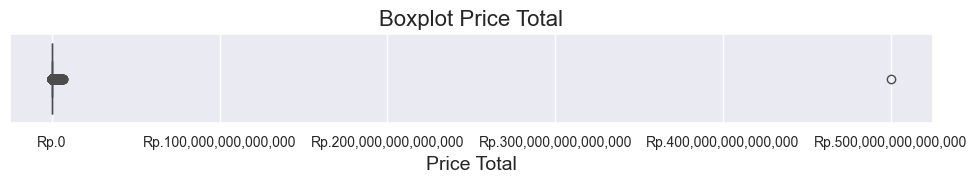

In [120]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['price_total'])
plt.title('Boxplot Price Total')
plt.xlabel('Price Total')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

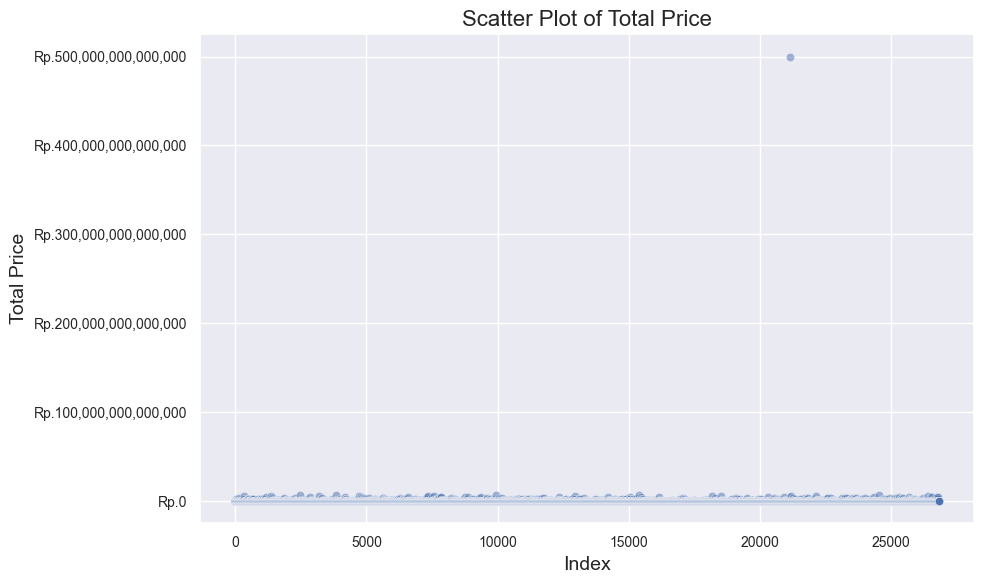

In [122]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='price_total', alpha=0.5)
plt.title('Scatter Plot of Total Price')
plt.xlabel('Index')
plt.ylabel('Total Price')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

In [123]:
Q1 = df['price_total'].quantile(0.25)
Q3 = df['price_total'].quantile(0.75)

# Menghitung Interquartile Range (IQR)
IQR = Q3 - Q1

# Menentukan ambang batas minimum untuk gaji
min_threshold = 0

# Menghitung batas bawah, dan memastikannya tidak negatif
lower_bound = max(Q1 - 1.5 * IQR, min_threshold)

# Menghitung batas atas
upper_bound = Q3 + 1.5 * IQR

print('lower_bound: ',lower_bound)
print('upper_bound: ', upper_bound)

lower_bound:  0
upper_bound:  34125000000.0


In [124]:
df = df[(df['price_total'] >= lower_bound) & (df['price_total'] <= upper_bound)]

- Data After Outlier Handling

In [125]:
df['price_total'].describe()

count    1.988200e+04
mean     7.328396e+09
std      7.148985e+09
min      0.000000e+00
25%      1.950000e+09
50%      4.875000e+09
75%      1.025950e+10
max      3.410000e+10
Name: price_total, dtype: float64

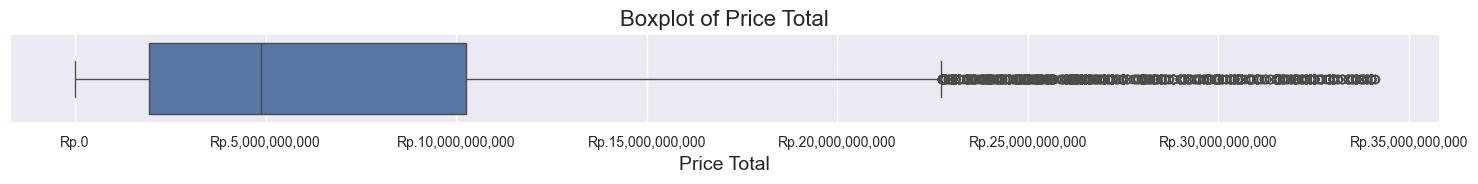

In [126]:
plt.figure(figsize=(15, 2))
sns.boxplot(x=df['price_total'])
plt.title('Boxplot of Price Total')
plt.xlabel('Price Total')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

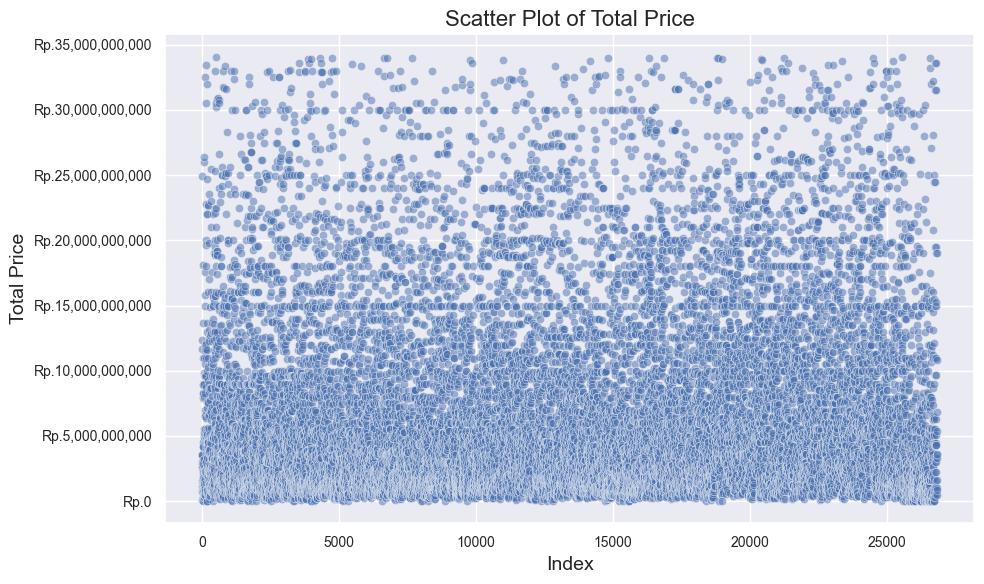

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='price_total', alpha=0.5)
plt.title('Scatter Plot of Total Price')
plt.xlabel('Index')
plt.ylabel('Total Price')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19882 entries, 0 to 26831
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          19882 non-null  object 
 1   land_area     19882 non-null  float64
 2   price_total   19882 non-null  float64
 3   price_per_m2  19882 non-null  float64
 4   subdistrict   19882 non-null  object 
 5   regency       19882 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.1+ MB


### Outlier Handling of Price Per m2

- Data Before Outlier Handling

In [129]:
df['price_per_m2'].describe()

count    1.988200e+04
mean     1.057832e+07
std      1.105663e+08
min      0.000000e+00
25%      3.650000e+06
50%      6.250000e+06
75%      1.094709e+07
max      9.000000e+09
Name: price_per_m2, dtype: float64

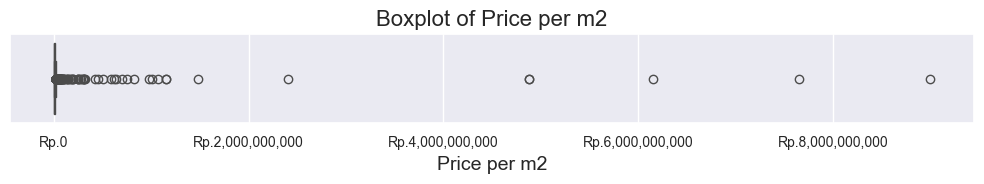

In [130]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['price_per_m2'])
plt.title('Boxplot of Price per m2')
plt.xlabel('Price per m2')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

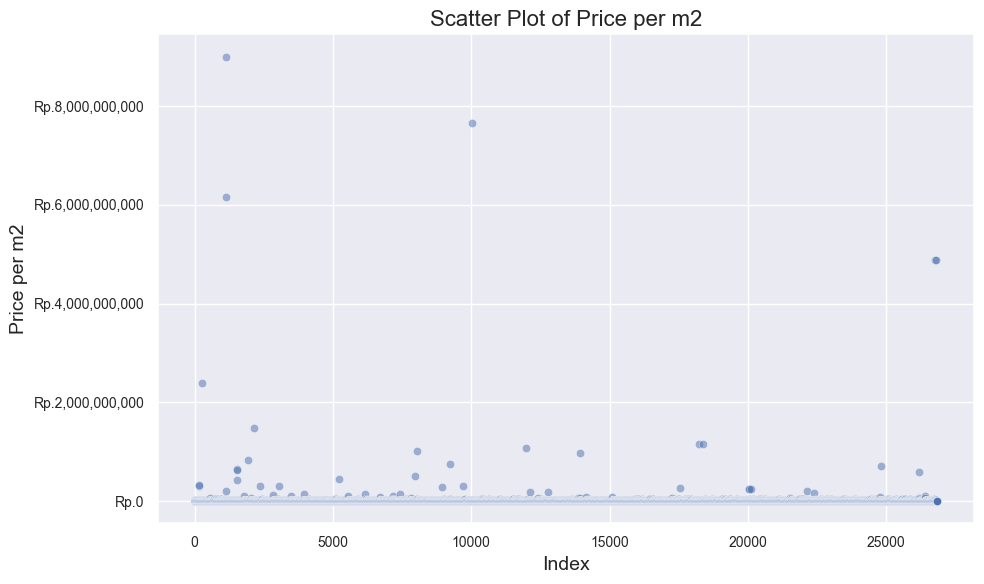

In [131]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='price_per_m2', alpha=0.5)
plt.title('Scatter Plot of Price per m2')
plt.xlabel('Index')
plt.ylabel('Price per m2')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

In [132]:
Q1 = df['price_per_m2'].quantile(0.25)
Q3 = df['price_per_m2'].quantile(0.75)

# Menghitung Interquartile Range (IQR)
IQR = Q3 - Q1

# Menentukan ambang batas minimum untuk gaji
min_threshold = 0

# Menghitung batas bawah, dan memastikannya tidak negatif
lower_bound = max(Q1 - 1.5 * IQR, min_threshold)

# Menghitung batas atas
upper_bound = Q3 + 1.5 * IQR

print('lower_bound: ',lower_bound)
print('upper_bound: ', upper_bound)

lower_bound:  0
upper_bound:  21892724.931750856


In [133]:
df = df[(df['price_per_m2'] >= lower_bound) & (df['price_per_m2'] <= upper_bound)]

In [134]:
df['price_per_m2'].describe()

count    1.916800e+04
mean     7.292355e+06
std      4.919074e+06
min      0.000000e+00
25%      3.500000e+06
50%      6.000000e+06
75%      9.809515e+06
max      2.188679e+07
Name: price_per_m2, dtype: float64

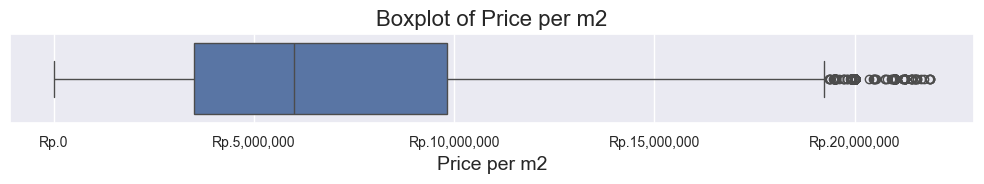

In [135]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['price_per_m2'])
plt.title('Boxplot of Price per m2')
plt.xlabel('Price per m2')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

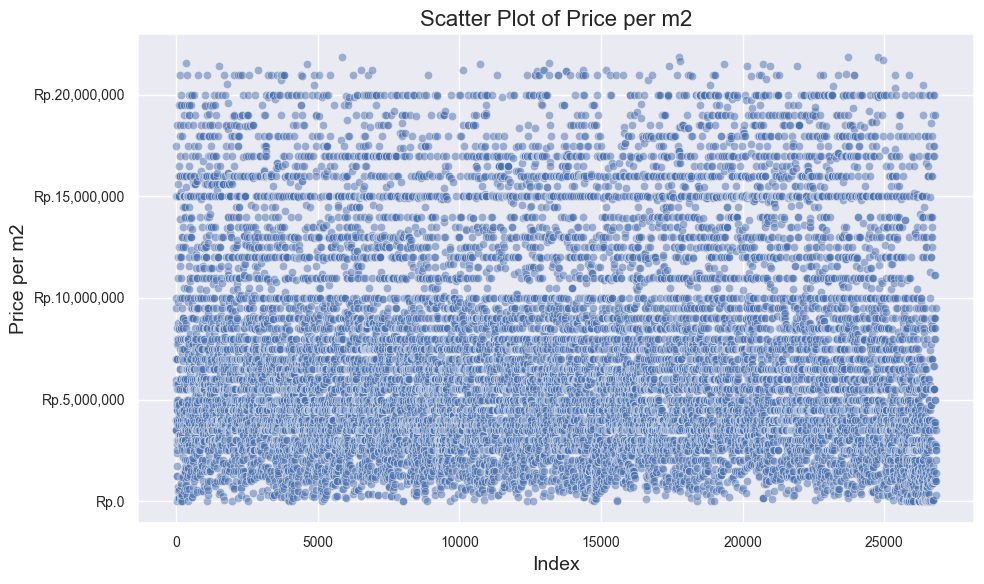

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='price_per_m2', alpha=0.5)
plt.title('Scatter Plot of Price per m2')
plt.xlabel('Index')
plt.ylabel('Price per m2')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19168 entries, 0 to 26831
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          19168 non-null  object 
 1   land_area     19168 non-null  float64
 2   price_total   19168 non-null  float64
 3   price_per_m2  19168 non-null  float64
 4   subdistrict   19168 non-null  object 
 5   regency       19168 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.0+ MB


# Data Transformation

### Convert Date Column to Datetime Datatype

In [138]:
df['date'] = pd.to_datetime(df['date'])

df_date_conv = df.copy()
df_date_conv.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency
0,2024-05-19,200.0,7.000000e+08,3500000.0,Ubud,Gianyar
1,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung
2,2024-05-19,376.0,3.572000e+09,9500000.0,Ungasan,Badung
3,2024-05-19,100.0,1.500000e+09,15000000.0,Seminyak,Badung
6,2024-05-19,3340.0,1.169000e+10,3500000.0,Ungasan,Badung


In [139]:
df_date_conv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19168 entries, 0 to 26831
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          19168 non-null  datetime64[ns]
 1   land_area     19168 non-null  float64       
 2   price_total   19168 non-null  float64       
 3   price_per_m2  19168 non-null  float64       
 4   subdistrict   19168 non-null  object        
 5   regency       19168 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.0+ MB


- Backup Dataframe

In [140]:
df = df_date_conv.copy()
df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency
0,2024-05-19,200.0,7.000000e+08,3500000.0,Ubud,Gianyar
1,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung
2,2024-05-19,376.0,3.572000e+09,9500000.0,Ungasan,Badung
3,2024-05-19,100.0,1.500000e+09,15000000.0,Seminyak,Badung
6,2024-05-19,3340.0,1.169000e+10,3500000.0,Ungasan,Badung


# Feature Engineering

### Check Dataframe

In [141]:
df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency
0,2024-05-19,200.0,7.000000e+08,3500000.0,Ubud,Gianyar
1,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung
2,2024-05-19,376.0,3.572000e+09,9500000.0,Ungasan,Badung
3,2024-05-19,100.0,1.500000e+09,15000000.0,Seminyak,Badung
6,2024-05-19,3340.0,1.169000e+10,3500000.0,Ungasan,Badung


### Check Land Area Column

In [142]:
df['land_area'].describe()

count    19168.000000
mean      1262.472037
std       1397.675827
min          1.000000
25%        323.750000
50%        700.000000
75%       1640.000000
max       7800.000000
Name: land_area, dtype: float64

### Make New Feature Based on Land Area

In [144]:
bins = [0, 325, 1640, float('inf')]
labels = ['small', 'medium', 'large']
df['land_area_cat'] = pd.cut(df['land_area'], bins=bins, labels=labels)

df.sort_values(by='land_area', ascending=True)

['small', 'medium', 'large']
Categories (3, object): ['small' < 'medium' < 'large']

# Export Dataframe to MongoDB

- Import Module

In [145]:
from scripts import load_data_to_mongo

- Export Data to MongoDB

In [153]:
data = df.to_dict(orient='index')

{0: {'date': Timestamp('2024-05-19 00:00:00'),
  'land_area': 200.0,
  'price_total': 700000000.0,
  'price_per_m2': 3500000.0,
  'subdistrict': 'Ubud',
  'regency': 'Gianyar',
  'land_area_cat': 'small'},
 1: {'date': Timestamp('2024-05-19 00:00:00'),
  'land_area': 200.0,
  'price_total': 800000000.0,
  'price_per_m2': 4000000.0,
  'subdistrict': 'Nusa Dua',
  'regency': 'Badung',
  'land_area_cat': 'small'},
 2: {'date': Timestamp('2024-05-19 00:00:00'),
  'land_area': 376.0,
  'price_total': 3572000000.0,
  'price_per_m2': 9500000.0,
  'subdistrict': 'Ungasan',
  'regency': 'Badung',
  'land_area_cat': 'medium'},
 3: {'date': Timestamp('2024-05-19 00:00:00'),
  'land_area': 100.0,
  'price_total': 1500000000.0,
  'price_per_m2': 15000000.0,
  'subdistrict': 'Seminyak',
  'regency': 'Badung',
  'land_area_cat': 'small'},
 6: {'date': Timestamp('2024-05-19 00:00:00'),
  'land_area': 3340.0,
  'price_total': 11690000000.0,
  'price_per_m2': 3500000.0,
  'subdistrict': 'Ungasan',
  're

In [155]:
load_data_to_mongo.load_to_mongo(data, 'clean')

----------------------------------------------
Connected to db
Total documents inserted: 19168
Total documents in collection: 19168
Dissconnected!
